In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data, wb
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import stats, integrate
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier
import bs4 as bs
import requests
import yfinance as yf
import seaborn as sns
import cvxpy as cp
from sklearn.cluster import AgglomerativeClustering

plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['lines.linewidth'] = 1.0
plt.style.use('dark_background')

In [2]:
#read in stock data from pi
SP_Close = pd.read_pickle('SP_Close.pkl')

In [3]:
import pickle

with open("res_old.pickle", 'rb') as handle:
    res_dict = pickle.load(handle)
print(len(res_dict))
# print(res_dict)

936


In [4]:
dict_63 = {}
dict_253 = {}

for i in res_dict.keys():
    if res_dict[i] is not None:
        if i[0] == i[2] and i[0] == 63:
            dict_63[i] = res_dict[i]
        elif i[0] == i[2] and i[0] == 253:
            dict_253[i] = res_dict[i]
            
print(len(dict_63))
print(len(dict_253))

278
284


In [5]:
(dict_63[(63, 1265, 63, -0.005, 0.01, 3, -0.02, 0.6, 0.05)]+1).cumprod()

2005-01-13    1.000000
2005-04-15    1.022919
2005-07-15    1.120106
2005-10-13    1.096708
2006-01-13    1.240176
2006-04-17    1.306995
2006-07-17    1.280875
2006-10-13    1.336082
2007-01-17    1.425167
2007-04-18    1.500979
2007-07-18    1.525022
2007-10-16    1.600750
2008-01-16    1.556988
2008-04-17    1.542565
2008-07-17    1.476375
2008-10-15    1.139146
2009-01-15    0.994657
2009-04-17    0.920596
2009-07-17    0.974998
2009-10-15    1.008904
2010-01-15    1.074669
2010-04-19    1.116771
2010-07-19    1.067813
2010-10-15    1.170596
2011-01-14    1.225636
2011-04-15    1.305990
2011-07-18    1.384408
2011-10-14    1.412686
2012-01-17    1.418869
2012-04-17    1.510577
2012-07-17    1.547021
2012-10-15    1.521878
2013-01-17    1.597845
2013-04-19    1.729684
2013-07-19    1.764521
2013-10-17    1.813210
2014-01-17    1.912160
2014-04-21    1.942314
2014-07-21    2.025125
2014-10-17    2.084187
2015-01-20    2.399677
2015-04-21    2.519476
2015-07-21    2.593189
2015-10-19 

In [6]:
(dict_63[(63, 253, 63, -0.007, 0.02, 2, -0.05, 0.7, 0.05)]+1).cumprod()

2005-01-07    1.053516
2005-04-11    1.116489
2005-07-11    1.115984
2005-10-07    1.106906
2006-01-09    1.154521
2006-04-10    1.174748
2006-07-11    1.188899
2006-10-09    1.198363
2007-01-10    1.302159
2007-04-12    1.339498
2007-07-12    1.350539
2007-10-10    1.382314
2008-01-10    1.417770
2008-04-11    1.267712
2008-07-11    1.279273
2008-10-09    1.068932
2009-01-09    1.019594
2009-04-13    0.947833
2009-07-13    0.948374
2009-10-09    0.984898
2010-01-11    1.033372
2010-04-13    1.051231
2010-07-13    1.045318
2010-10-11    1.064350
2011-01-10    1.049892
2011-04-11    1.129009
2011-07-12    1.224140
2011-10-10    1.287100
2012-01-10    1.282472
2012-04-11    1.270085
2012-07-11    1.358722
2012-10-09    1.349372
2013-01-11    1.346548
2013-04-15    1.498812
2013-07-15    1.462146
2013-10-11    1.478503
2014-01-13    1.534365
2014-04-14    1.504238
2014-07-15    1.599023
2014-10-13    1.570912
2015-01-13    1.811977
2015-04-15    1.814079
2015-07-15    1.901577
2015-10-13 

In [7]:
ret_63 = {}
ret_253 = {}

for i in dict_63.keys():
    ret_63[i] = (dict_63[i]+1).cumprod()
for i in dict_253.keys():
    ret_253[i] = (dict_253[i]+1).cumprod()
            
print(len(ret_63))
print(len(ret_253))

278
284


In [11]:
for i in range(len(iter_params)):
    print(iter_names[i])
    tmp = 0
    for j in range(len(iter_params[i])):
        for k in ret_63.keys():
            if k[iter_ind[i]] == iter_params[i][j]:
                tmp += 1
    print(tmp)

prior_prd_list
278
low_stk_bound_list
278
up_stk_bound_list
278
cluster_u_coef_list
278
cluster_l_coef_list
278
corr_thesh_list
278


In [9]:
rebal_prd_list = [63,253]#[21,63,253],
prior_prd_list = [253,2*253,5*253]
update_prd_list = [21,63, 253]
low_stk_bound_list = [-.007, -.005, -.003]
up_stk_bound_list = [.01,.02,.05,.1]
cluster_u_coef_list = [2,3,5]
cluster_l_coef_list = [-.02, -.05, -.1]
corr_thesh_list = [.5,.6,.7,.8]
stock_tresh_list = [.05]

In [ ]:
'prior_prd_list': 2*253 (definitively the best)
'low_stk_bound_list': -.003 (definitively the best)
'up_stk_bound_list': 0.01 (probably the best)
'cluster_u_coef_list' 3 maybe. not much impact (all are pretty much the same)
'cluster_l_coef_list': -0.02 (probably the best)
'corr_thesh_list': 0.8 (probably the best)

In [10]:
iter_params = [prior_prd_list,low_stk_bound_list,up_stk_bound_list,cluster_u_coef_list,cluster_l_coef_list,corr_thesh_list]
iter_names = ['prior_prd_list','low_stk_bound_list','up_stk_bound_list','cluster_u_coef_list','cluster_l_coef_list','corr_thesh_list']
iter_ind = [1,3,4,5,6,7]
colors = ['red','green','blue','yellow']

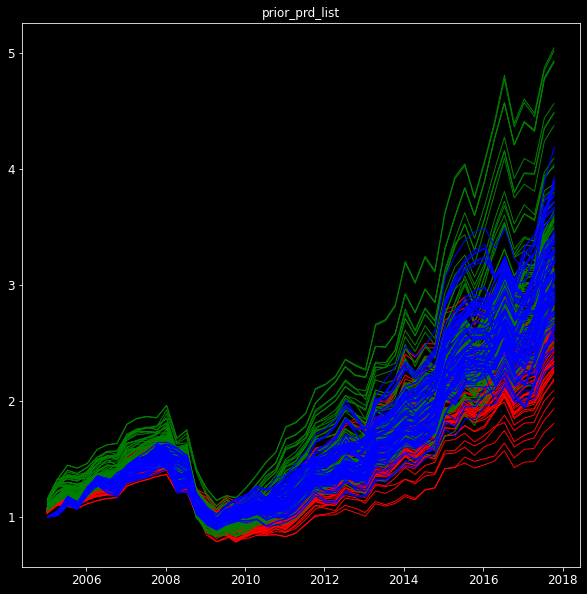

legend for above graph:
[253, 506, 1265]
['red', 'green', 'blue']
mean final cumulative returns:
[2.644063271645387, 3.32408000557537, 3.12504462458168]


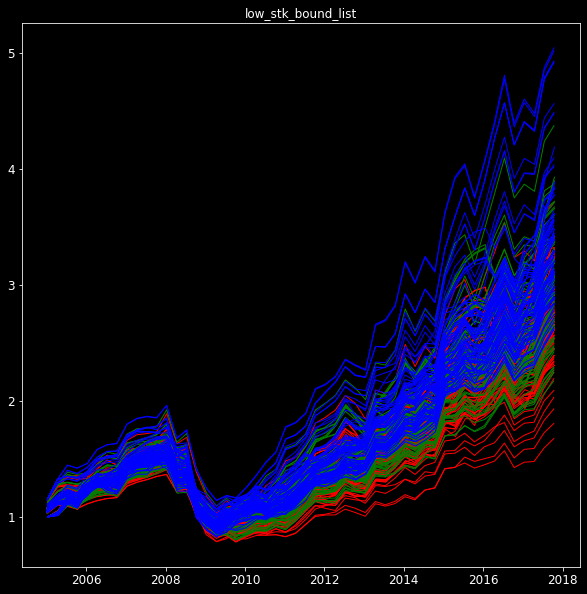

legend for above graph:
[-0.007, -0.005, -0.003]
['red', 'green', 'blue']
mean final cumulative returns:
[2.760004412557559, 3.0294462256398984, 3.404627971977839]


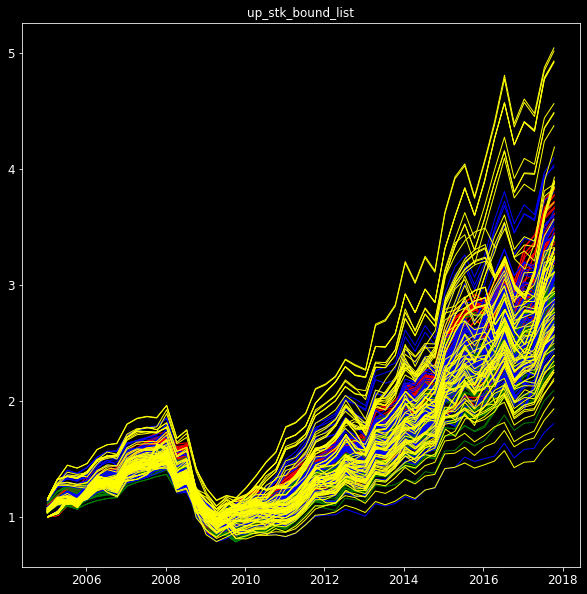

legend for above graph:
[0.01, 0.02, 0.05, 0.1]
['red', 'green', 'blue', 'yellow']
mean final cumulative returns:
[3.218554372993981, 2.86723436252182, 3.017484729370722, 3.1655255044119186]


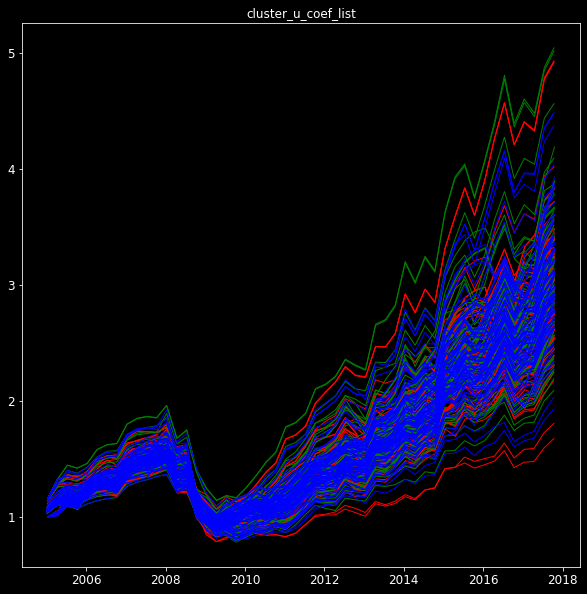

legend for above graph:
[2, 3, 5]
['red', 'green', 'blue']
mean final cumulative returns:
[3.023576270682724, 3.088034280178034, 3.0724912276282543]


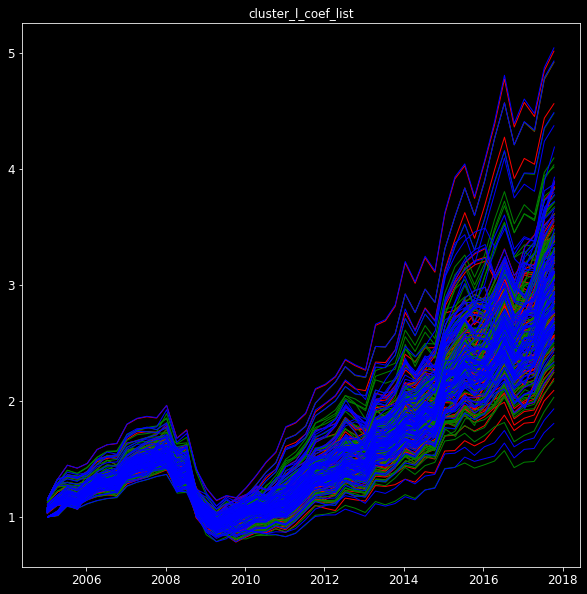

legend for above graph:
[-0.02, -0.05, -0.1]
['red', 'green', 'blue']
mean final cumulative returns:
[3.0720163984010465, 3.014086262014761, 3.1005646405639347]


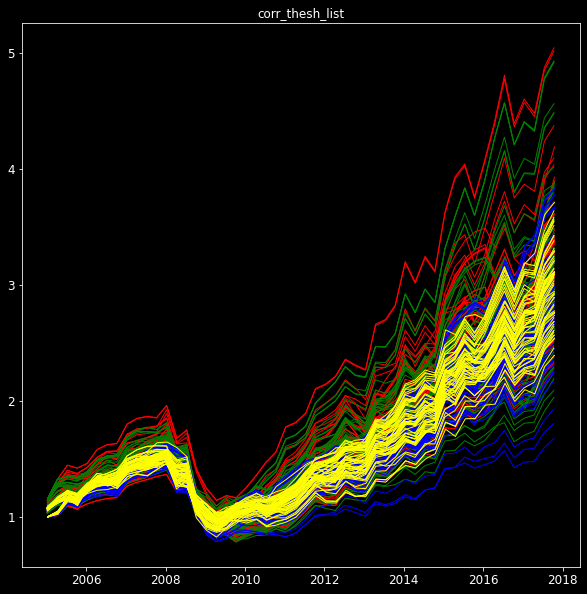

legend for above graph:
[0.5, 0.6, 0.7, 0.8]
['red', 'green', 'blue', 'yellow']
mean final cumulative returns:
[3.203127168588327, 3.1542871757498228, 2.8469493292408203, 3.0155914122667427]


In [12]:
for i in range(len(iter_params)):
    means = []
    for j in range(len(iter_params[i])):
        mean_calc = 0
        mean_count = 0
        for k in ret_63.keys():
            if k[iter_ind[i]] == iter_params[i][j]:
                plt.plot(ret_63[k],color=colors[j])
                mean_calc += ret_63[k][-1]
                mean_count += 1
        means.append(mean_calc/mean_count)
    plt.title(iter_names[i])
    plt.show()
    print('legend for above graph:')
    print(iter_params[i])
    print(colors[:len(iter_params[i])])
    print('mean final cumulative returns:')
    print(means)

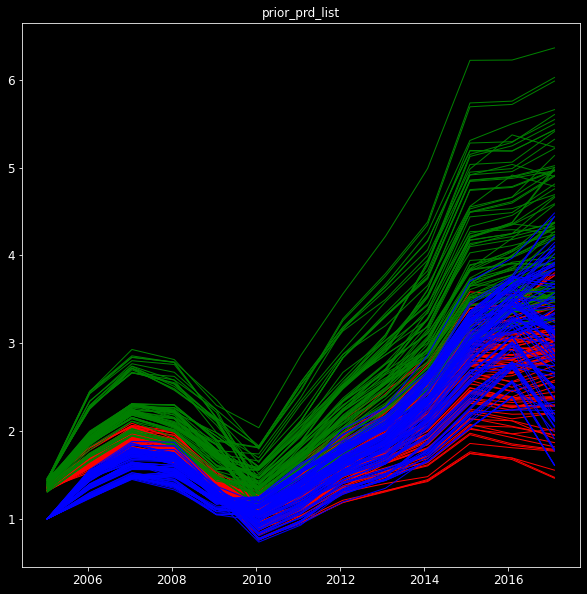

legend for above graph:
[253, 506, 1265]
['red', 'green', 'blue']
mean final cumulative returns:
[2.7562567154126625, 4.362399308965026, 3.023106751552685]


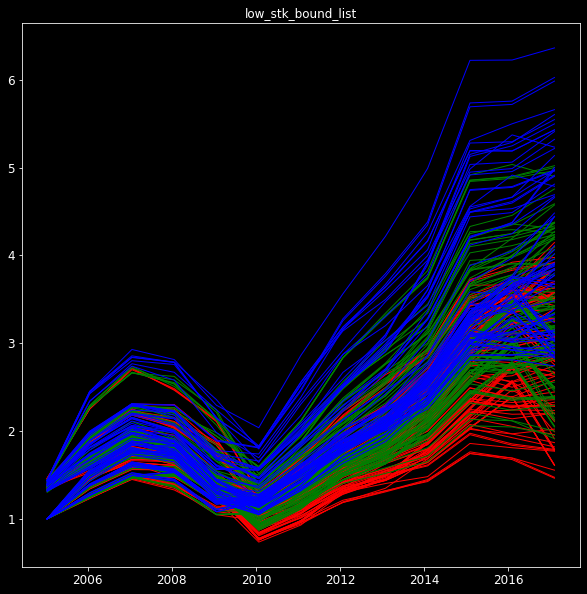

legend for above graph:
[-0.007, -0.005, -0.003]
['red', 'green', 'blue']
mean final cumulative returns:
[2.810213768983104, 3.3019531424224184, 3.9792318155874975]


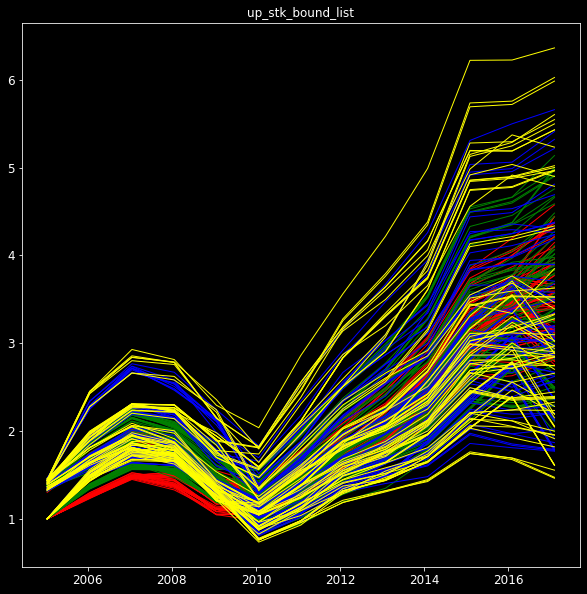

legend for above graph:
[0.01, 0.02, 0.05, 0.1]
['red', 'green', 'blue', 'yellow']
mean final cumulative returns:
[3.511212452659798, 3.4458204672618593, 3.1396842538156675, 3.2448044339933184]


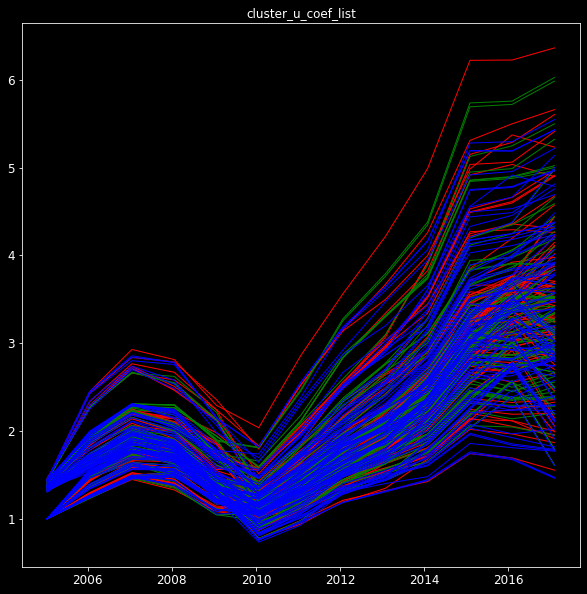

legend for above graph:
[2, 3, 5]
['red', 'green', 'blue']
mean final cumulative returns:
[3.425062263202145, 3.301224258308056, 3.3097133440503965]


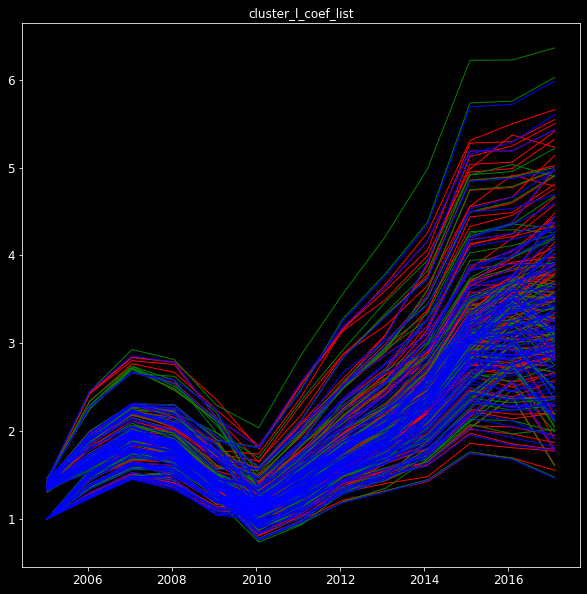

legend for above graph:
[-0.02, -0.05, -0.1]
['red', 'green', 'blue']
mean final cumulative returns:
[3.4405515692036834, 3.279425207662715, 3.2825958036915406]


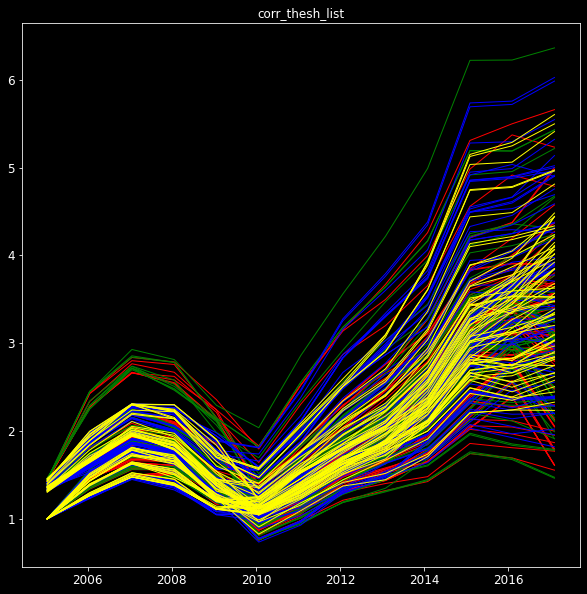

legend for above graph:
[0.5, 0.6, 0.7, 0.8]
['red', 'green', 'blue', 'yellow']
mean final cumulative returns:
[3.0575953180097235, 3.1100013938383024, 3.6108265297951756, 3.613086890264762]


In [13]:
for i in range(len(iter_params)):
    means = []
    for j in range(len(iter_params[i])):
        mean_calc = 0
        mean_count = 0
        for k in ret_253.keys():
            if k[iter_ind[i]] == iter_params[i][j]:
                plt.plot(ret_253[k],color=colors[j])
                mean_calc += ret_253[k][-1]
                mean_count += 1
        means.append(mean_calc/mean_count)
    plt.title(iter_names[i])
    plt.show()
    print('legend for above graph:')
    print(iter_params[i])
    print(colors[:len(iter_params[i])])
    print('mean final cumulative returns:')
    print(means)